In [1]:
# Authore: D.Krishnaiah
# Date: 14-01-2021

In [2]:
import numpy as np 
import pandas as pd 
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pprint
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Loading the spam data
# ham is the label for non-spam messages

path = '../data/Text HAM SPAM calssification.csv'
df_sms = pd.read_csv(path,encoding='latin-1')
df_sms.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...
5,ham,Ha ha ha good joke. Girls are situation seekers.
6,ham,Its a part of checking IQ
7,ham,"Sorry my roommates took forever, it ok if I co..."
8,ham,Ok lar i double check wif da hair dresser alre...
9,spam,"As a valued customer, I am pleased to advise y..."


In [4]:
df_sms = df_sms.rename(columns={"Category":"label", "Message":"sms"})
df_sms.head(10)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...
5,ham,Ha ha ha good joke. Girls are situation seekers.
6,ham,Its a part of checking IQ
7,ham,"Sorry my roommates took forever, it ok if I co..."
8,ham,Ok lar i double check wif da hair dresser alre...
9,spam,"As a valued customer, I am pleased to advise y..."


In [5]:
# Checking the maximum length of SMS
print(len(df_sms))

5026


In [6]:
# CHECK THE DATATYPES OF ALL COLUMNS: 
print(df_sms.dtypes)

label    object
sms      object
dtype: object


In [7]:
print(df_sms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1726 non-null   object
 1   sms     1791 non-null   object
dtypes: object(2)
memory usage: 78.7+ KB
None


In [8]:
# Number of observations in each label spam and ham
df_sms.label.value_counts()

ham     1490
spam     236
Name: label, dtype: int64

In [9]:
df_sms.describe()

,label,sms
count,1726,1791
unique,2,1729
top,ham,"Sorry, I'll call later"
freq,1490,10


In [10]:
#checking the number of empty rows in th csv file
print (df_sms.isnull().sum())

label    3300
sms      3235
dtype: int64


In [11]:
#Droping the empty rows
df_sms = df_sms.dropna()

#Saving it to the csv file 
# df_sms.to_csv('../data/preprocessed_data.csv',index=False)

In [12]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head(10)

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,Your gonna have to pick up a $1 burger for you...,108
5,ham,Ha ha ha good joke. Girls are situation seekers.,48
6,ham,Its a part of checking IQ,25
7,ham,"Sorry my roommates took forever, it ok if I co...",56
8,ham,Ok lar i double check wif da hair dresser alre...,110
9,spam,"As a valued customer, I am pleased to advise y...",153


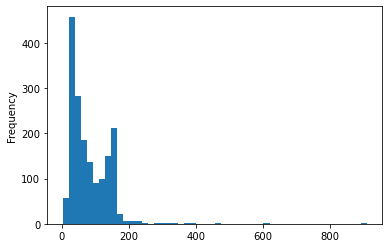

In [13]:
df_sms['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3F9FE62B0>,
      dtype=object)

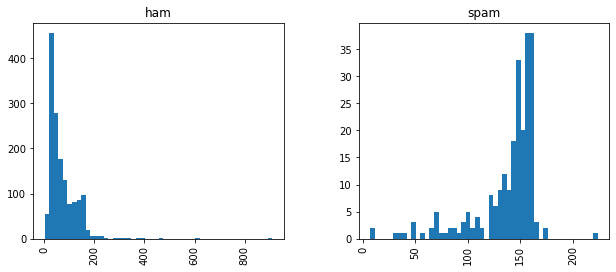

In [14]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [15]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(1726, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,Your gonna have to pick up a $1 burger for you...,108


In [16]:
#############################################

In [19]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

In [20]:
lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [21]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [22]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [23]:
frequency_list = []
frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [24]:
count_vector = CountVectorizer()

In [25]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [26]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [27]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [29]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

In [30]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

In [31]:
# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [32]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

predictions = naive_bayes.predict(testing_data)
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9739884393063584
Precision score: 0.9555555555555556
Recall score: 0.86
F1 score: 0.9052631578947369
